<a href="https://colab.research.google.com/github/CHITRANS-06/Flight-Price-Prediction/blob/main/Flight_ticket_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)

### Importing Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv(r'/content/drive/MyDrive/Projects/Airline Flight Prediction/Flight_Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### Dropping unwanted column

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.shape

(300153, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df['duration'].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

## EDA

#### Multivariate

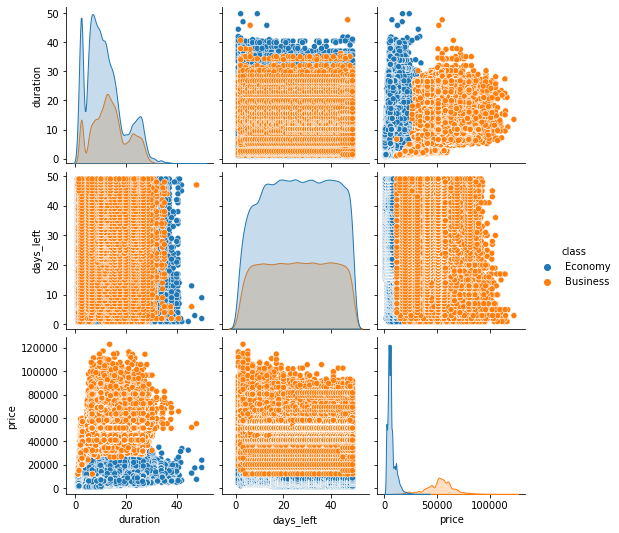

In [11]:
sns.pairplot(df, hue = 'class')

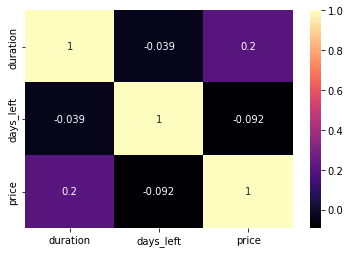

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='magma')

#### Univariate

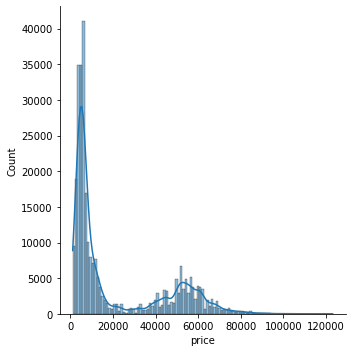

In [13]:
sns.displot(df['price'],kde=True);

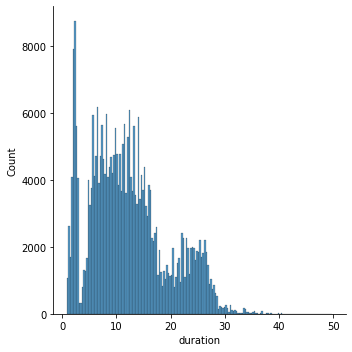

In [14]:
sns.displot(df['duration'],kde=False)

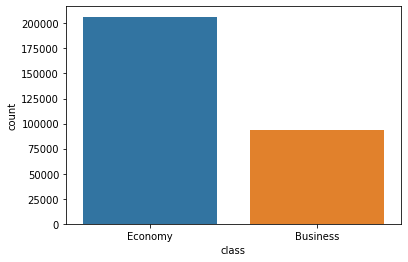

In [15]:
sns.countplot(data = df, x = "class")

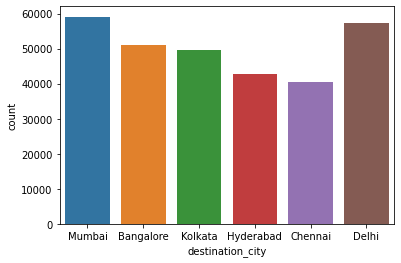

In [16]:
sns.countplot(x='destination_city',data=df)
#df['destination_city'].value_counts().plot(kind='bar')

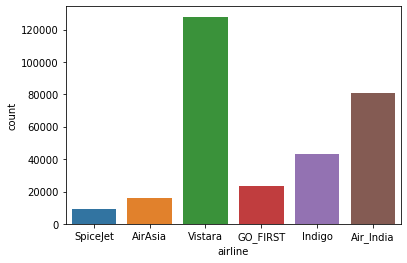

In [17]:
sns.countplot(x='airline',data=df)
#df['airline'].value_counts().plot(kind='bar')

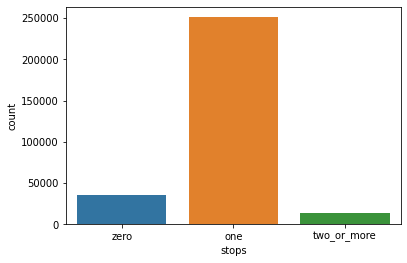

In [18]:
sns.countplot(x='stops',data=df)
#df['stops'].value_counts().plot(kind='bar')

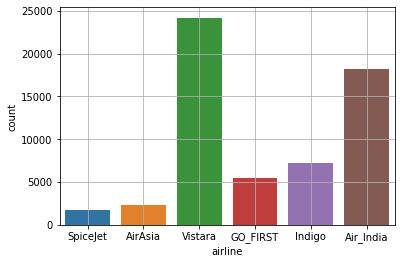

In [19]:
sns.countplot(x='airline',data=df[(df.destination_city=='Mumbai')])
plt.grid()

In [20]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

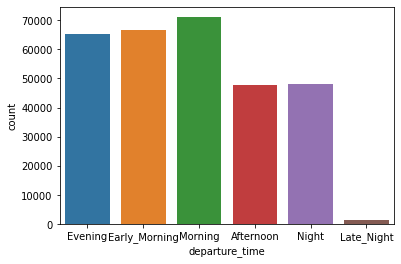

In [21]:
sns.countplot(x='departure_time',data=df)

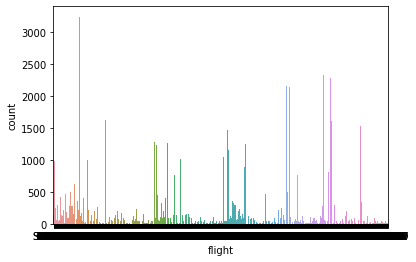

In [22]:
sns.countplot(x='flight',data=df)

In [23]:
df.shape

(300153, 11)

#### Bivariate

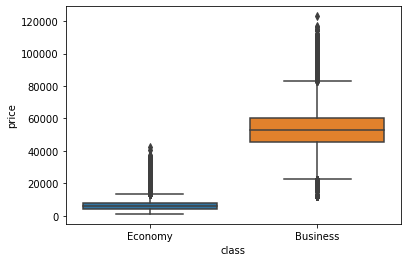

In [24]:
sns.boxplot(x = 'class', 
            y = 'price', 
            data = df);

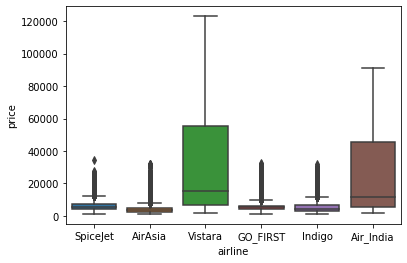

In [25]:
sns.boxplot(x = 'airline', 
            y = 'price', 
            data = df);

In [26]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

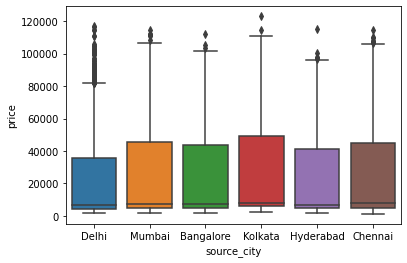

In [27]:
sns.boxplot(x ='source_city',y='price',data=df);

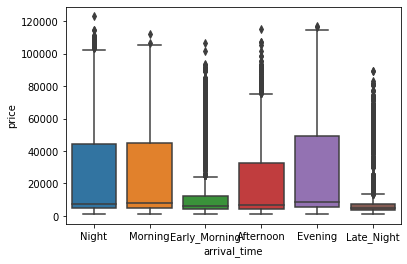

In [28]:
sns.boxplot(x ='arrival_time',y='price',data=df);

In [29]:
df.drop('flight', axis = 1, inplace = True)

In [30]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


#### Correcting the DataType

In [32]:
df['airline'] = df['airline'].astype('category')
df['source_city'] = df['source_city'].astype('category')
df['departure_time'] = df['departure_time'].astype('category')
df['stops'] = df['stops'].astype('category')
df['arrival_time'] = df['arrival_time'].astype('category')
df['destination_city'] = df['destination_city'].astype('category')
df['class'] = df['class'].astype('category')
print("Formatted Data Types\n",df.dtypes)

Formatted Data Types
 airline             category
source_city         category
departure_time      category
stops               category
arrival_time        category
destination_city    category
class               category
duration             float64
days_left              int64
price                  int64
dtype: object


In [33]:
df1 = df

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300153 non-null  category
 1   source_city       300153 non-null  category
 2   departure_time    300153 non-null  category
 3   stops             300153 non-null  category
 4   arrival_time      300153 non-null  category
 5   destination_city  300153 non-null  category
 6   class             300153 non-null  category
 7   duration          300153 non-null  float64 
 8   days_left         300153 non-null  int64   
 9   price             300153 non-null  int64   
dtypes: category(7), float64(1), int64(2)
memory usage: 8.9 MB


### Getting Dummies for Categorical

In [35]:
df2=pd.get_dummies(df,drop_first=True)

In [36]:
df2.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1


#### Extracting X and Y

In [37]:
x = df2.drop(["price"],axis=1)
y = df2.price

In [38]:
x

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
300149,10.42,49,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
300150,13.83,49,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
300151,10.00,49,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [39]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [41]:
X

array([[-1.39753079, -1.84387477, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       [-1.3752838 , -1.84387477, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       [-1.39753079, -1.84387477, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       ...,
       [ 0.22371837,  1.69569214, -0.60739623, ..., -0.44457466,
        -0.49513513, -1.48682175],
       [-0.30881888,  1.69569214, -0.60739623, ..., -0.44457466,
        -0.49513513, -1.48682175],
       [-0.29769538,  1.69569214, -0.60739623, ..., -0.44457466,
        -0.49513513, -1.48682175]])

#### Splitting Train Test

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [43]:
X_train

array([[ 0.30575413,  0.81080041, -0.60739623, ..., -0.44457466,
         2.01965066,  0.67257558],
       [ 0.28211671, -0.07409131,  1.64637176, ..., -0.44457466,
        -0.49513513,  0.67257558],
       [-0.42422512,  1.1795053 ,  1.64637176, ..., -0.44457466,
        -0.49513513, -1.48682175],
       ...,
       [-0.36721722, -0.4427962 , -0.60739623, ..., -0.44457466,
        -0.49513513,  0.67257558],
       [ 0.83829137,  1.54821019,  1.64637176, ..., -0.44457466,
        -0.49513513,  0.67257558],
       [ 0.96621154,  0.29461357, -0.60739623, ..., -0.44457466,
        -0.49513513,  0.67257558]])

In [44]:
 y_train

100519     6568
204636     5762
244395    51117
178251     3859
231235    54608
          ...  
211543    22152
86293     10744
122579    13386
152315     4893
117952     6510
Name: price, Length: 225114, dtype: int64

### Assumptions
#### Fitting an initial model to check assumption

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [47]:
 from sklearn.metrics import r2_score

In [48]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9111401975783084


### Residual

In [49]:
residuals = y_train-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.6756799601947e-11


### Check for Homoscedasticity

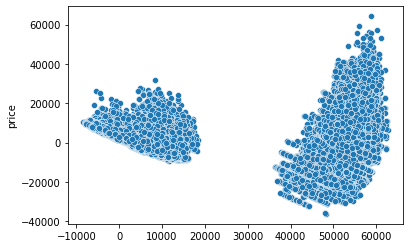

In [50]:
sns.scatterplot(x = y_pred,y = residuals)
sns.lineplot(color='blue')

In [51]:
results = pd.DataFrame([y_pred, residuals]).T

In [52]:
results.columns = ["expected", "residuals"]

In [53]:
results.head()

,expected,residuals
0,8623.042073,-2055.042073
1,5307.047614,454.952386
2,48962.155693,2154.844307
3,8292.921109,-4433.921109
4,52814.652022,1793.347978


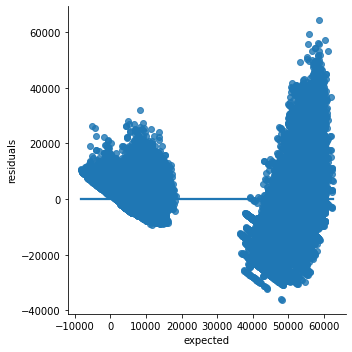

In [54]:
sns.lmplot(x ="expected", y = "residuals", data = results)

## Check for Normality of error terms/residuals

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


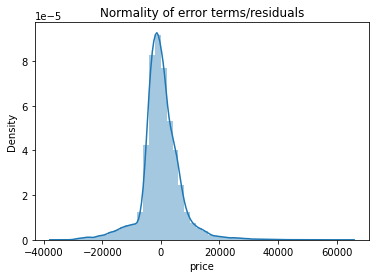

In [55]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals');

## No autocorrelation of residuals

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


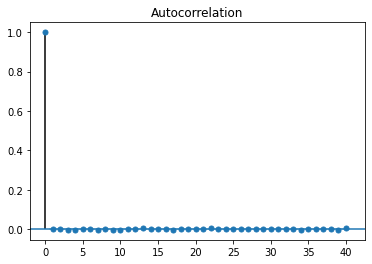

In [56]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

# partial autocorrelation

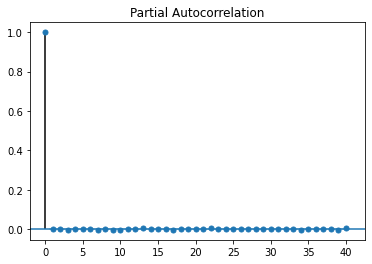

In [57]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

## Multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

In [60]:
vif_DF = pd.DataFrame([df2.columns,vif]).T
vif_DF.columns = ["features", "VIF"]

In [61]:
vif_DF

,features,VIF
0,duration,1.87023
1,days_left,1.005511
2,price,5.13468
3,airline_Air_India,2.311006
4,airline_GO_FIRST,3.347779
5,airline_Indigo,1.588838
6,airline_SpiceJet,5.981852
7,airline_Vistara,1.582179
8,source_city_Chennai,1.888203
9,source_city_Delhi,1.629258


#### All the VIF is less than 10. 
#### All the assumptions are satisfied.

In [62]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [63]:
regr.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred = regr.predict(X_test)

In [65]:
from sklearn.metrics import r2_score
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))
print("Adjusted R Squared:", 1 - (1-regr.score(X_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1))

R squared: 0.9123956150125179
Adjusted R Squared: 0.9123868581351493
